In [10]:
from matplotlib import pyplot
from pandas import read_csv
series = read_csv('daily-births.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

## Plots and descriptions of 2 series of data 'series' and 'series1'

In [11]:
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [12]:
series.size

365

In [13]:
print(series['1959-01'])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64


In [14]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


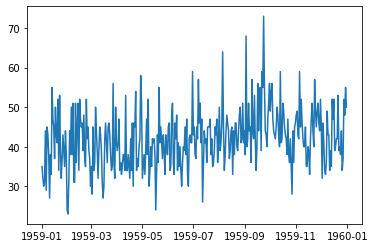

In [15]:
pyplot.plot(series)
pyplot.show()

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


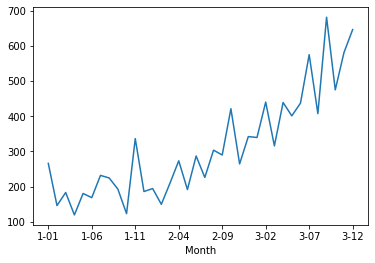

In [16]:
series1 = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series1.plot()
pyplot.show()

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


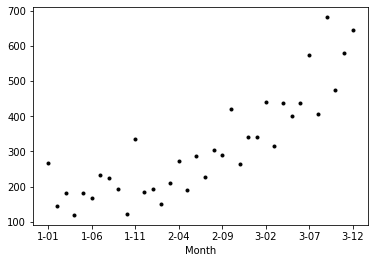

In [17]:
series1.plot(style='k.')
pyplot.show()

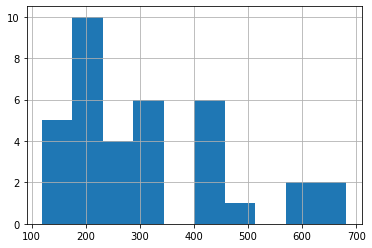

In [18]:
series1.hist()
pyplot.show()

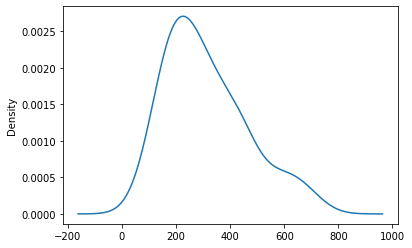

In [19]:
series1.plot(kind='kde')
pyplot.show()

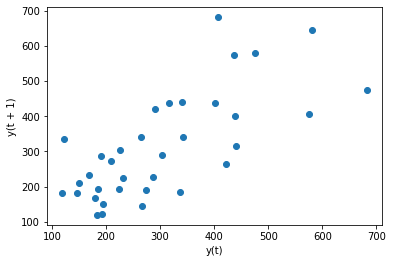

In [27]:
from pandas.plotting import lag_plot
lag_plot(series1)
pyplot.show()

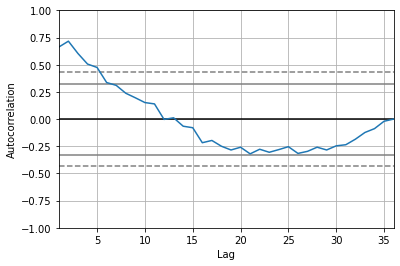

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series1)
pyplot.show()

## Persistence Forecast Model

In [34]:
# Create lagged dataset
from pandas import concat
values = DataFrame(series1.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [35]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [36]:
# persistence model
def model_persistence(x):
	return x

In [42]:
# walk-forward validation
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 17730.518


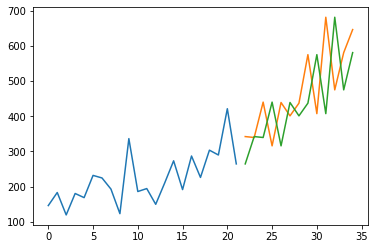

In [43]:
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()